<a href="https://colab.research.google.com/github/Frenchyy1/test/blob/master/Coronavirus1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lecture

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url='https://www.data.gouv.fr/fr/datasets/r/f4935ed4-7a88-44e4-8f8a-33910a151d42'
df=pd.read_csv(url, sep=';', skiprows=3)

In [0]:
df.head()

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
0,2020-04-23,Andorre,723,37,309,5.12,42.74,52.14
1,2020-04-23,Émirats Arabes Unis,8238,52,1546,0.63,18.77,80.60
2,2020-04-23,Afghanistan,1176,40,166,3.40,14.12,82.48
3,2020-04-23,Antigua-et-Barbuda,24,3,10,12.50,41.67,45.83
4,2020-04-23,Albanie,634,27,356,4.26,56.15,39.59


# Graphique sur la base du nb de jours écoulés

In [0]:
df200=df[df.Infections > 200]

In [0]:
df200.sort_values(["Pays", "Date"], ascending=True, inplace=True)
df200['Dat1'] = df200.groupby(['Pays'])['Date'].transform('first')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df200.Date=pd.to_datetime(df200.Date)
df200.Dat1=pd.to_datetime(df200.Dat1)
df200['time since'] = (df200['Date'] - df200["Dat1"]).dt.days

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
worldstat = df200.groupby('Pays')["Infections"].sum().sort_values(ascending=False)
c10 = worldstat.head(10).index.tolist()
c10cases = df200[df200['Pays'].isin(c10)]
cis= df200[df200['Pays']=='Israël']
c10cases=pd.concat([c10cases, cis], ignore_index=True)

In [0]:
#worldstat = df200.groupby('Pays')["Infections"].sum().sort_values(ascending=False)
#c10cases = df200[df200['Pays'].isin(["Israël", "Royaume-Uni", 'France', 'États-Unis'])]

In [0]:
c10cases = df200[df200['Pays'].isin(["Israël", 'France', "États-Unis", "Italie"])]

In [0]:
c10cases['Infectionsl']=np.log(c10cases['Infections'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
c10cases

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection,Dat1,time since,Infectionsl
8850,2020-03-03,France,204,4,12,1.96,5.88,92.16,2020-03-03,0,5.318120
8740,2020-03-04,France,285,4,12,1.40,4.21,94.39,2020-03-03,1,5.652489
8682,2020-03-05,France,377,6,12,1.59,3.18,95.23,2020-03-03,2,5.932245
8556,2020-03-06,France,653,9,12,1.38,1.84,96.78,2020-03-03,3,6.481577
8490,2020-03-07,France,949,11,12,1.16,1.26,97.58,2020-03-03,4,6.855409
...,...,...,...,...,...,...,...,...,...,...,...
971,2020-04-19,États-Unis,759086,40661,70337,5.36,9.27,85.38,2020-03-05,45,13.539870
604,2020-04-20,États-Unis,784326,42094,72329,5.37,9.22,85.41,2020-03-05,46,13.572580
577,2020-04-21,États-Unis,812036,44444,75204,5.47,9.26,85.27,2020-03-05,47,13.607300
210,2020-04-22,États-Unis,839675,46583,77366,5.55,9.21,85.24,2020-03-05,48,13.640770


In [0]:
confirm_w = pd.pivot_table(c10cases.dropna(subset=['Infectionsl']), index='time since', 
                         columns='Pays', values='Infectionsl', aggfunc=np.sum)

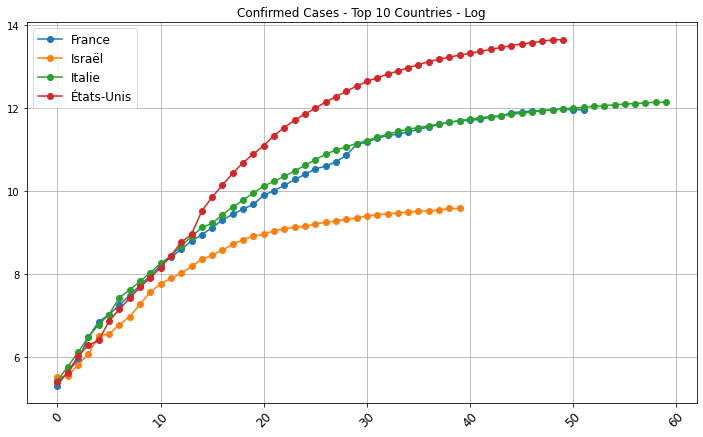

In [0]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(confirm_w, marker='o')
plt.title('Confirmed Cases - Top 10 Countries - Log')
ax.legend(confirm_w.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.xticks(rotation=45, fontsize=12)
#ax.set_yscale("log")
ax.grid(True)
plt.show()

In [0]:
dfcountrydaily=c10cases.copy().reset_index()

In [0]:
dfcountrydaily['Infday']=dfcountrydaily['Infections'].diff(1).fillna(0)
dfcountrydaily.loc[dfcountrydaily['time since'] ==0 , 'Infday'] = 0

In [0]:
dfcountrydaily[dfcountrydaily['Pays'] =="Israël"]

,index,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection,Dat1,time since,Infectionsl,Infday
52,7489,2020-03-15,Israël,251,0,4,0.00,1.59,98.41,2020-03-15,0,5.525453,0.0
53,7316,2020-03-16,Israël,255,0,4,0.00,1.57,98.43,2020-03-15,1,5.541264,4.0
54,7169,2020-03-17,Israël,337,0,11,0.00,3.26,96.74,2020-03-15,2,5.820083,82.0
55,6988,2020-03-18,Israël,433,0,11,0.00,2.54,97.46,2020-03-15,3,6.070738,96.0
56,6836,2020-03-19,Israël,677,0,11,0.00,1.62,98.38,2020-03-15,4,6.517671,244.0
57,6643,2020-03-20,Israël,705,0,14,0.00,1.99,98.01,2020-03-15,5,6.558198,28.0
58,6485,2020-03-21,Israël,883,1,36,0.11,4.08,95.81,2020-03-15,6,6.783325,178.0
59,6280,2020-03-22,Israël,1071,1,37,0.09,3.45,96.45,2020-03-15,7,6.976348,188.0
60,6116,2020-03-23,Israël,1442,1,41,0.07,2.84,97.09,2020-03-15,8,7.273786,371.0
61,5910,2020-03-24,Israël,1930,3,53,0.16,2.75,97.10,2020-03-15,9,7.565275,488.0


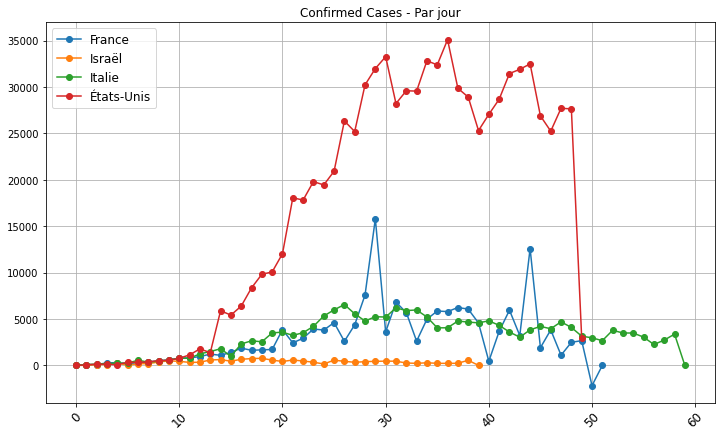

In [0]:
confirm_w = pd.pivot_table(dfcountrydaily.dropna(subset=['Infday']), index='time since', columns='Pays', values='Infday', aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(confirm_w, marker='o')
plt.title('Confirmed Cases - Par jour')
ax.legend(confirm_w.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.xticks(rotation=45, fontsize=12)
ax.grid(True)
plt.show()

# Israel

In [0]:
dfi=df[df["Pays"]=="Israël"]

In [0]:
#df["l200"]=df['Infections'].apply(lambda x: 1 if x > 200 else 0)
#df200=df[df.l200==1]
#df200=df200.groupby(["Pays"], as_index=False)["Date"].first()
#fus200=pd.merge(df, df200, on='Pays', how='left')
#fus200=fus200.dropna(subset=['Date_y'])
#fus200.Date_x=pd.to_datetime(fus200.Date_x)
#fus200.Date_y=pd.to_datetime(fus200.Date_y)
#fus200['time since'] = (fus200['Date_x'] - fus200["Date_y"]).dt.days


# Etude d'un pays

In [0]:
dfi=df[df["Pays"].isin(["Israël", "Royaume-Uni", 'France', 'États-Unis'])]
dfi.Date = pd.to_datetime(dfi.Date)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
from matplotlib import dates
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
def tsplot(df, date, axy, byhue):
  ax=sns.lineplot(data=df, x=date, y=axy, hue=byhue, marker='o')
  #ax.set(xticks=df.Date.values) Pour 1 libellé pour chaque point x
  ax.tick_params(rotation=45)
  plt.xlabel('Evolution', fontsize=20)
  # Define the date format
  date_form = DateFormatter("%m-%d")
  ax.xaxis.set_major_formatter(date_form)
  # Ensure a major tick for each week using (interval=1) 
  ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))


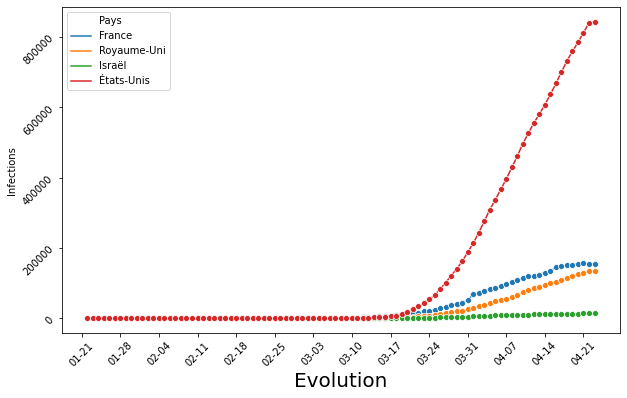

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
tsplot(dfi, 'Date', 'Infections', "Pays")

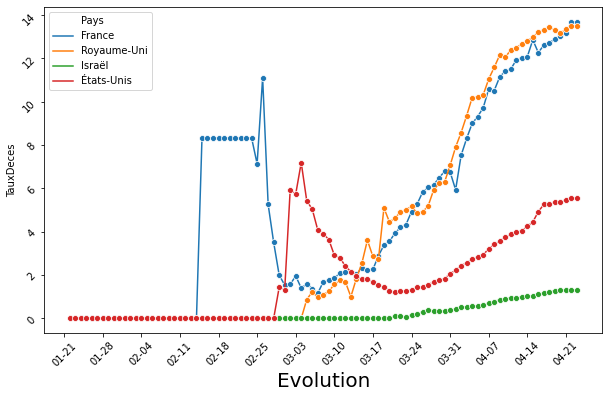

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
tsplot(dfi, 'Date', 'TauxDeces', "Pays")

# Ensemble de pays (les x 1 ers)

In [0]:
worldstat = df.groupby('Pays')["Infections"].sum().sort_values(ascending=False)

In [0]:
c10 = worldstat.head(10).index.tolist()
# Confirmed cases
c10cases = df[df['Pays'].isin(c10)]
confirm_w = pd.pivot_table(c10cases.dropna(subset=['Infections']), index='Date', 
                         columns='Pays', values='Infections', aggfunc=np.sum).fillna(method = 'ffill')
confirm_w = confirm_w.drop(['Chine'], axis=1)

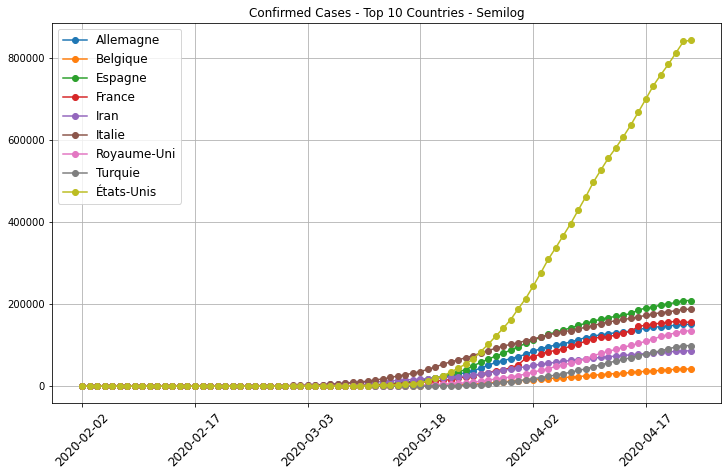

In [0]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(confirm_w[confirm_w.index>'2020-02-01'], marker='o')
plt.title('Confirmed Cases - Top 10 Countries - Semilog')
ax.legend(confirm_w.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
#ax.set_yscale("log")
plt.xticks(rotation=45, fontsize=12)
ax.grid(True)
plt.show()

# Taux de décès

In [0]:
c10 = worldstat.head(10).index.tolist()
# Confirmed cases
c10cases = df[df['Pays'].isin(c10)]
confirm_w = pd.pivot_table(c10cases.dropna(subset=['TauxDeces']), index='Date', 
                         columns='Pays', values='TauxDeces', aggfunc=np.sum).fillna(method = 'ffill')
confirm_w = confirm_w.drop(['Chine'], axis=1)

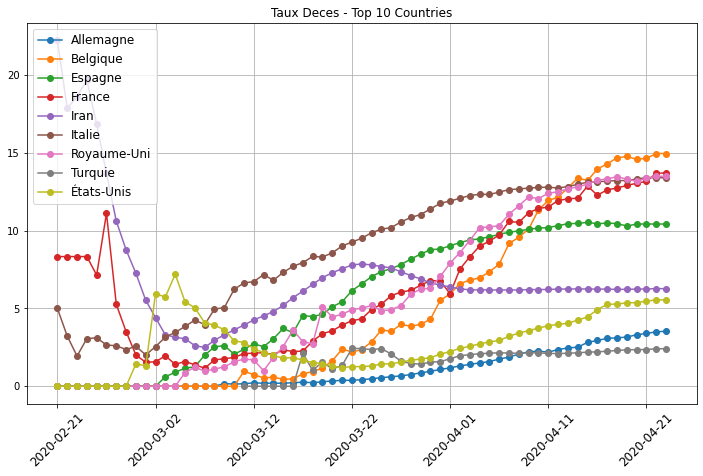

In [0]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(confirm_w[confirm_w.index>'2020-02-20'], marker='o')
plt.title('Taux Deces - Top 10 Countries')
ax.legend(confirm_w.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.xticks(rotation=45, fontsize=12)
ax.grid(True)
plt.show()

# Etude bivariée

In [0]:
dflast=df[df.Date==df.Date.max()]

In [0]:
dflast=dflast[(dflast.TauxGuerison !=0) & (dflast.TauxDeces !=0) & (dflast.TauxGuerison !=100) & (dflast.TauxDeces !=100) & (dflast.Infections > 200)]

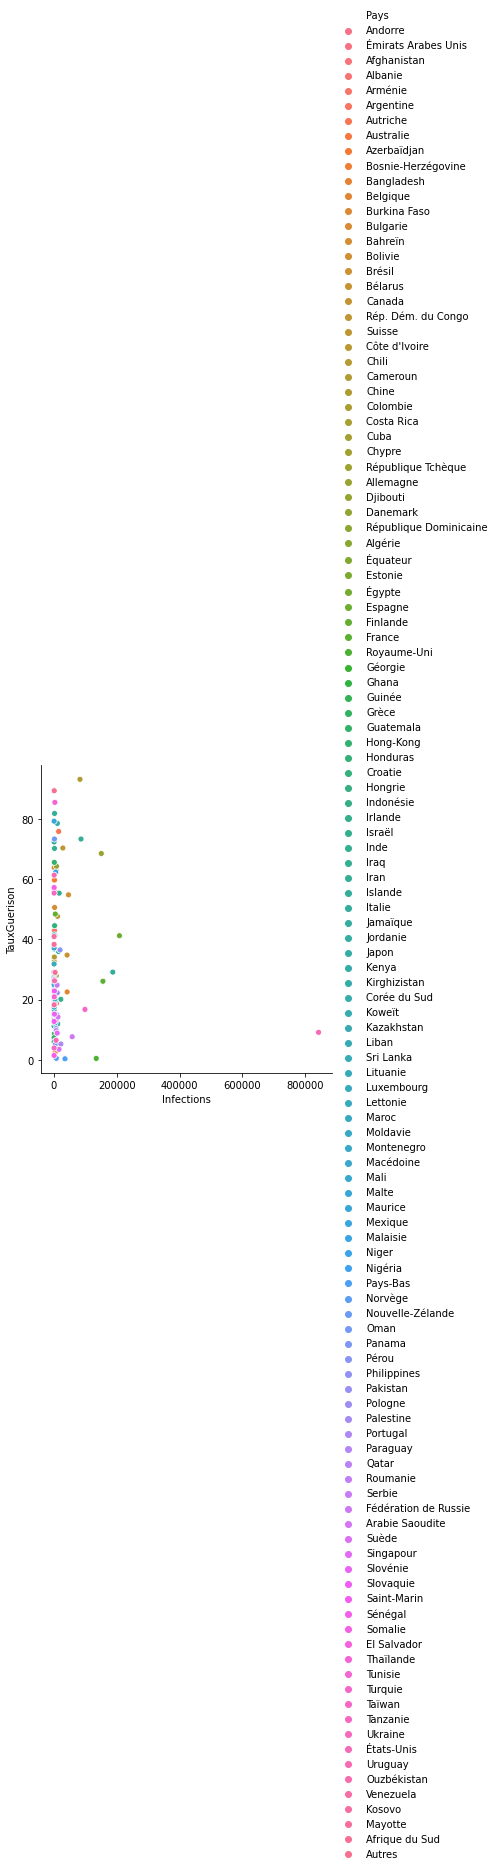

In [0]:
sns.relplot(data=dflast, hue="Pays", x='Infections', y="TauxGuerison")

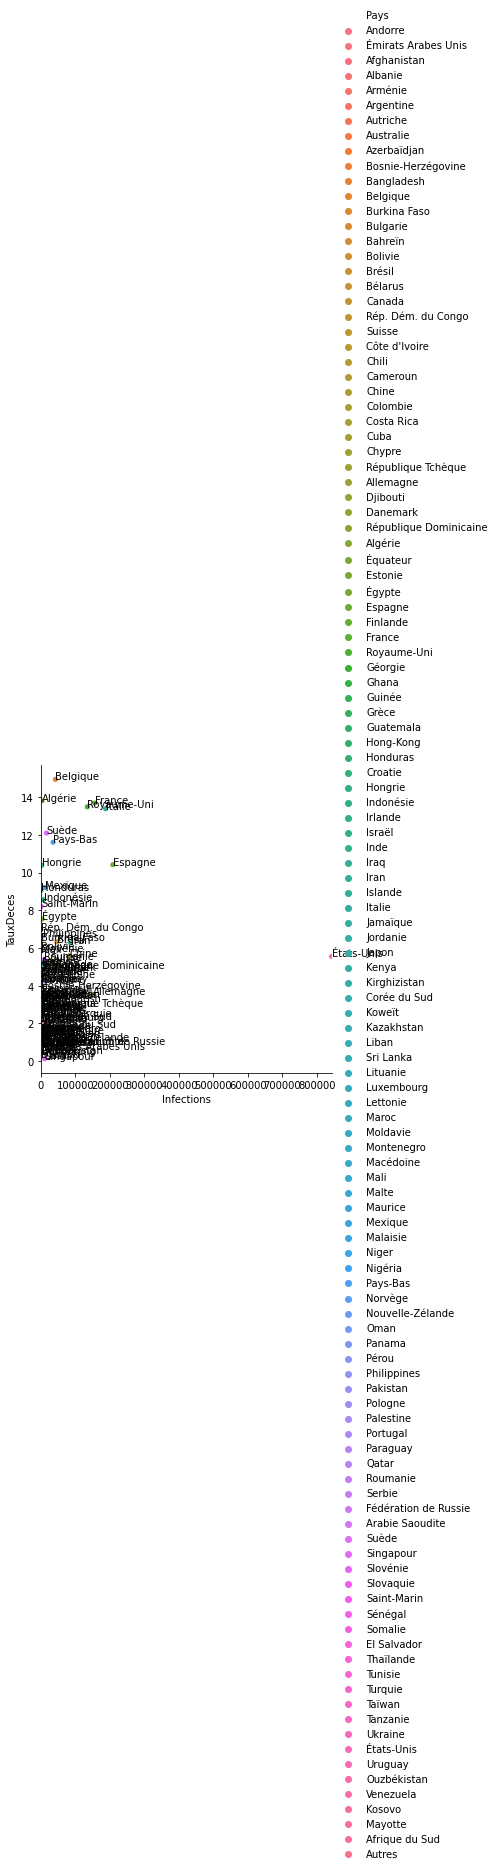

In [0]:
p1=sns.relplot(data=dflast, hue="Pays", x='Infections', y="TauxDeces")
for ax in p1.axes[0]:
    ax.set_xlim(0.0, max(dflast["Infections"]) + 1.9)
for row in dflast.itertuples():
    ax.text(row.Infections + 0.5, row.TauxDeces, row.Pays, horizontalalignment='left')
plt.show()

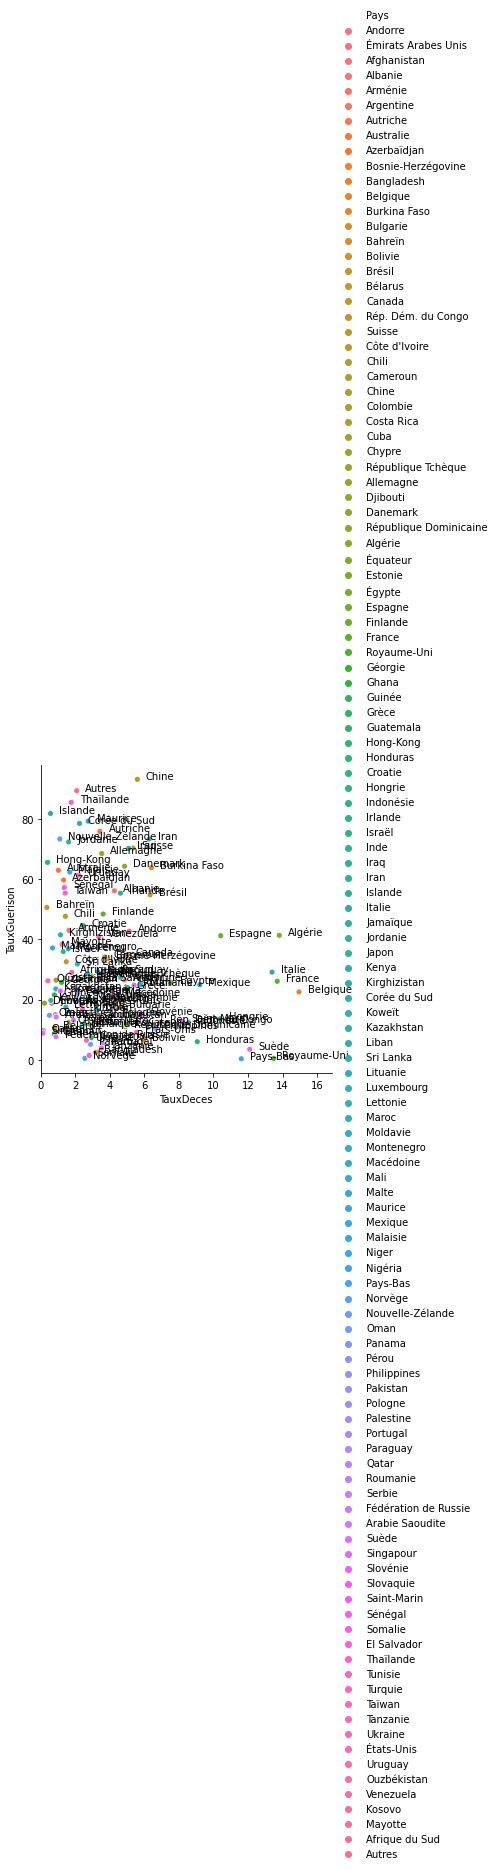

In [0]:
p1=sns.relplot(data=dflast, x='TauxDeces', y="TauxGuerison", hue="Pays")
for ax in p1.axes[0]:
    ax.set_xlim(0.0, max(dflast["TauxDeces"]) + 1.9)
for row in dflast.itertuples():
    ax.text(row.TauxDeces + 0.5, row.TauxGuerison, row.Pays, horizontalalignment='left')
plt.show()

# Croisement avec la pop + de 65 ans

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
url="https://raw.githubusercontent.com/Frenchyy1/test/master/Data/Pop%20plus%20de%2065%20ans%20world.csv"
dfp=pd.read_csv(url, sep=';' ,header=0,index_col=0, encoding='latin-1' , decimal=",", error_bad_lines=False)

In [0]:
fus=pd.merge(dflast, dfp, on='Pays', how='inner')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


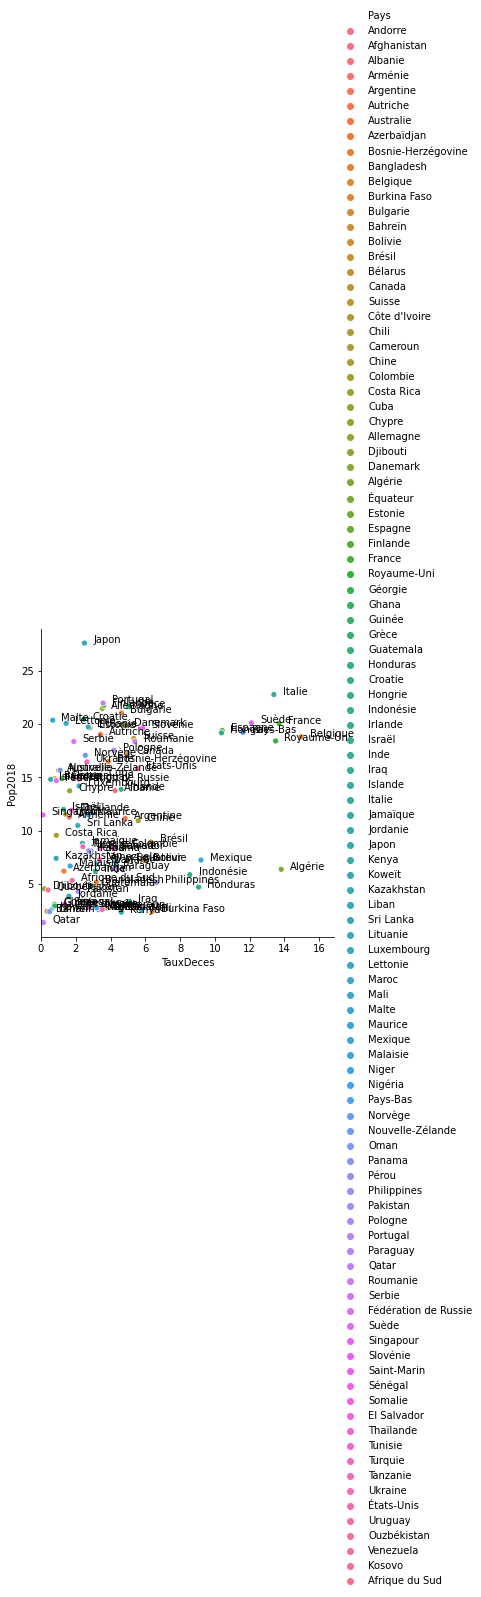

In [68]:
p1=sns.relplot(data=fus, x='TauxDeces', y="Pop2018", hue="Pays")
for ax in p1.axes[0]:
    ax.set_xlim(0.0, max(fus["TauxDeces"]) + 1.9)
for row in fus.itertuples():
    ax.text(row.TauxDeces + 0.5, row.Pop2018, row.Pays, horizontalalignment='left')
plt.show()

# chine

In [0]:
dfi=df[df["Pays"]=="Chine"]

In [0]:
dfi.Date = pd.to_datetime(dfi.Date)
dfi.set_index("Date", inplace=True)
dfi['Infections'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Evolution', fontsize=20);